# **Short project - Hand gesture recognition using the TAP**

## **1.Data Handling**

In [1]:
# Basic libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

# Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report                      

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm                                                
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Other libraries
import plotly.graph_objects as go                                       
import timeit

In [2]:
df = pd.read_csv('data_tap2.txt', delimiter = ",")
#df = pd.read_csv('/content/drive/MyDrive/Machine Learning & Pattern Recognition/short_project/data_tap.txt',delimiter=",")
df.head()

,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12,acc13,acc14,acc15,simbology
0,32,6,-8,11,-7,30,6,7,32,8,7,30,9,-7,31,A
1,33,6,-9,12,-8,29,6,7,32,8,7,30,8,-7,31,A
2,33,5,-8,11,-7,30,6,8,32,8,7,31,8,-6,31,A
3,33,5,-8,11,-7,30,5,7,32,8,7,30,8,-7,31,A
4,33,5,-8,11,-7,30,5,7,32,7,8,31,7,-6,32,A


In [3]:
print(df.shape)

(4910, 16)


In [4]:
# Eliminate the nan values
df.dropna()

,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12,acc13,acc14,acc15,simbology
0,32,6,-8,11,-7,30,6,7,32,8,7,30,9,-7,31,A
1,33,6,-9,12,-8,29,6,7,32,8,7,30,8,-7,31,A
2,33,5,-8,11,-7,30,6,8,32,8,7,31,8,-6,31,A
3,33,5,-8,11,-7,30,5,7,32,8,7,30,8,-7,31,A
4,33,5,-8,11,-7,30,5,7,32,7,8,31,7,-6,32,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,31,-3,11,22,6,24,30,10,1,22,18,8,25,8,18,*
4906,31,-3,15,21,9,24,29,13,0,23,21,5,23,13,18,*
4907,29,-6,16,21,9,24,30,11,-2,25,20,4,26,12,17,*
4908,29,-8,14,18,8,25,29,11,2,22,20,7,23,12,18,*


In [5]:
# Change the string values in simbology to int values:
df['simbology'] = df['simbology'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J4', 'K', 'L', 'M', 'N',
                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '*'],
                                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])
true_simbology = df['simbology']
true_simbology

0        1
1        1
2        1
3        1
4        1
        ..
4905    27
4906    27
4907    27
4908    27
4909    27
Name: simbology, Length: 4910, dtype: int64

## **2. Dimensionality Reduction**

In [6]:
# 1) Normalize the data
D = df.iloc[:,:-1].to_numpy()
D_st= StandardScaler().fit_transform(D)
pd.DataFrame(D_st)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.002298,1.748204,-0.619942,-0.446031,-1.513200,1.239762,-0.504859,-1.028903,1.667274,-0.295250,-2.085835,1.745051,-0.333559,-2.669101,1.525393
1,1.097862,1.748204,-0.687835,-0.371358,-1.602376,1.157865,-0.504859,-1.028903,1.667274,-0.295250,-2.085835,1.745051,-0.402661,-2.669101,1.525393
2,1.097862,1.657534,-0.619942,-0.446031,-1.513200,1.239762,-0.504859,-0.905197,1.667274,-0.295250,-2.085835,1.824909,-0.402661,-2.549003,1.525393
3,1.097862,1.657534,-0.619942,-0.446031,-1.513200,1.239762,-0.566687,-1.028903,1.667274,-0.295250,-2.085835,1.745051,-0.402661,-2.669101,1.525393
4,1.097862,1.657534,-0.619942,-0.446031,-1.513200,1.239762,-0.566687,-1.028903,1.667274,-0.359907,-1.913559,1.824909,-0.471762,-2.549003,1.624745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,0.906733,0.932178,0.670025,0.375373,-0.353908,0.748381,0.979007,-0.657784,-0.679828,0.609950,-0.190802,-0.011824,0.772065,-0.867621,0.233812
4906,0.906733,0.932178,0.941597,0.300700,-0.086379,0.748381,0.917179,-0.286666,-0.755541,0.674608,0.326026,-0.251398,0.633862,-0.267128,0.233812
4907,0.715604,0.660170,1.009490,0.300700,-0.086379,0.748381,0.979007,-0.534078,-0.906967,0.803922,0.153750,-0.331256,0.841167,-0.387227,0.134460
4908,0.715604,0.478831,0.873704,0.076681,-0.175556,0.830277,0.917179,-0.534078,-0.604115,0.609950,0.153750,-0.091682,0.633862,-0.387227,0.233812


Text(0, 0.5, 'Number of components')

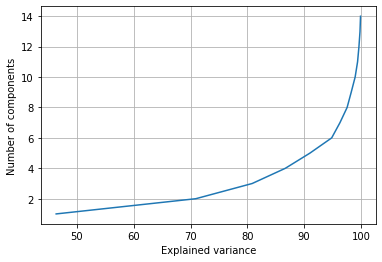

In [7]:
# 2) Apply a decomposition analysis to all the features to observe the variance
pca = decomposition.PCA(n_components=14).fit(D_st)
exp_var = 100*pca.explained_variance_ratio_.cumsum()

# Plot the explained variance as a function of the components
plt.plot(exp_var,np.arange(1, 15, 1))
plt.grid()
plt.xlabel('Explained variance')
plt.ylabel('Number of components')

In [8]:
# Explained variance taking (4, 5 or 6) components
print('The 4th PCA component explains {} % of the variability of the data'.format(exp_var[3]))
print('The 5th PCA component explains {} % of the variability of the data'.format(exp_var[4]))
print('The 6th PCA component explains {} % of the variability of the data'.format(exp_var[5]))

pca_4comp = decomposition.PCA(n_components=4).fit(D_st)
pca_5comp = decomposition.PCA(n_components=5).fit(D_st)
pca_6comp = decomposition.PCA(n_components=6).fit(D_st)

# Chose the amount of components to visualize the accuracies later
pca = pca_5comp

The 4th PCA component explains 86.69628772484569 % of the variability of the data
The 5th PCA component explains 91.0323005376687 % of the variability of the data
The 6th PCA component explains 94.86018352619156 % of the variability of the data


In [9]:
# Data projected
Xproj = pca.transform(D_st) 
print(Xproj.shape)

(4910, 5)


We projected our dataset features dimensions from 21 to 15 (eliminating the imu values), and from 15 to 5 (performing a PCA). With 5 dimensions we are able to compress more than 90% of the variance of our data.

In [10]:
Xproj = pd.DataFrame(Xproj)
Xproj['symbols'] = df['simbology']
Xproj = shuffle(Xproj)
Xproj

,0,1,2,3,4,symbols
4594,-1.643444,-2.906104,0.795698,-0.353852,0.944956,26
4494,-1.204968,0.117731,0.055079,2.054404,1.604996,25
3449,0.382489,0.925134,-1.875030,0.416503,-0.013510,20
3973,0.014571,-1.515505,-0.558300,-1.466472,0.749050,22
170,-2.405810,1.430056,-0.040458,-1.124748,0.823098,4
...,...,...,...,...,...,...
1134,5.047967,-1.879849,0.121635,1.212388,-0.257297,8
4115,-1.612848,-2.442198,1.324930,-1.463302,0.003462,23
2446,-1.512631,1.138960,-1.513265,-0.189716,-0.877006,14
1460,-2.174386,-0.008311,-0.125569,2.654241,0.114270,9


## **3. Classifiers**

In [11]:
# Without PCA -> consider df 
# With PCA -> consider Xproj

# keep only numeric variables 
df_num = Xproj.select_dtypes(include='number') 

In [12]:
# Define the train dataset (70%) and the test dataset (30%)
[row, col] = df_num.shape
training_rows = math.ceil(row*.7)
testing_rows = math.floor(row*.3)

# trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)
data_train = df_num.iloc[:training_rows,:col-1]
label_train = df_num.iloc[:training_rows,col-1:]
data_test = df_num.iloc[training_rows:,:col-1]
label_test = df_num.iloc[training_rows:,col-1:]
label_test

,symbols
1841,11
3927,22
422,5
4695,26
4348,25
...,...
1134,8
4115,23
2446,14
1460,9


### Linear Discriminant Analysis

In [13]:
# Training the model 
#clf_lda = LinearDiscriminantAnalysis(n_components=27,priors=None)  
clf_lda = LinearDiscriminantAnalysis(n_components=5,priors=None)
#clf_lda.fit(data_train, label_train)                               #Miguel: linea cambiada por la siguiente 
clf_lda.fit(data_train, label_train['symbols'].values)

# Predict with test data
label_predicted_lda = clf_lda.predict(data_test)

In [14]:
# Accuracy score
accur1 = accuracy_score(label_test, label_predicted_lda)
print('The accuracy of the LDA is: {} %'.format(accur1*100))

LDA_4comp = 91.17
LDA_5comp = 97.02
LDA_6comp = 97.14

The accuracy of the LDA is: 97.21656483367278 %


### Quadratic Discriminant Analysis


In [15]:
# Training the model 
clf_qda = QuadraticDiscriminantAnalysis(priors=None)
#clf_qda.fit(data_train, label_train)                                 
clf_qda.fit(data_train, label_train['symbols'].values)

# Predict with test data
label_predicted_qda = clf_qda.predict(data_test)

In [16]:
# Accuracy score
accur2 = accuracy_score(label_test, label_predicted_qda)
print('The accuracy of the QDA is: {} %'.format(accur2*100))

QDA_4comp = 97.21
QDA_5comp = 98.98
QDA_6comp = 99.11

The accuracy of the QDA is: 99.45689069925322 %


### Support Vector Machines


SVC implements the “one-versus-one” approach for multi-class classification. In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 

In [17]:
support = svm.SVC() 
support.fit(data_train, label_train['symbols'].values)
print('The accuracy of the SVM is: {} %'.format(100*support.score(data_test, label_test)))

label_predicted_svm = support.predict(data_test)

svm_4comp = 94.84
svm_5comp = 99.18
svm_6comp = 98.98

The accuracy of the SVM is: 98.98167006109979 %


In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator. We will use Scikit-Learn's support vector classifier to train an SVM model on this data. 
A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

The advantages of support vector machines are:

*  Effective in high dimensional spaces.

*  Still effective in cases where number of dimensions is greater than the number of samples.

*  Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [18]:
# The localization of the support vectors
pd.DataFrame(support.support_vectors_) 

,0,1,2,3,4
0,-3.480831,2.578625,1.422329,0.128717,-0.496587
1,-3.302113,2.828317,1.132090,-0.025150,-0.562073
2,-2.134368,4.178775,0.432562,0.324965,-1.064677
3,-3.046697,3.892114,0.875275,-0.522514,-0.924044
4,-2.129320,3.671643,-0.392037,0.445573,-0.908453
...,...,...,...,...,...
1193,-3.540548,-1.284515,0.692667,0.649897,-1.413113
1194,-1.699958,-0.512964,-1.241499,0.314936,-1.069390
1195,-3.058037,-0.321554,-0.368477,0.508304,-1.798974
1196,-2.334572,0.320285,-0.295670,0.034361,-1.315837


In [19]:
# Only x points are important in order to build the classifier
support.dual_coef_.sum()
# If he sum is equal to 0; then it is well balanced

0.0

In [20]:
# indices of support vectors
support.support_

array([ 151,  868, 1149, ..., 3396, 3427, 3431], dtype=int32)

In [21]:
# get number of support vectors for each class
support.n_support_

array([17, 22, 24, 38, 71, 25, 38, 32, 58, 50, 46, 35, 74, 75, 73, 39, 31,
       17, 43, 74, 68, 43, 51, 21, 44, 33, 56], dtype=int32)

### Random forests

In [22]:
forest = RandomForestClassifier()
#forest.fit(data_train, label_train)                         
forest.fit(data_train, label_train['symbols'].values)
print('The accuracy of the RandomForest is: {} %'.format(100*forest.score(data_test, label_test)))

label_predicted_rf = forest.predict(data_test)

rf_4comp = 96.87
rf_5comp = 98.84
rf_6comp = 99.11

The accuracy of the RandomForest is: 99.38900203665987 %


## **4. Performance Analysis**

In [23]:
# Accuracy of each classifier depending on the dimensions used for the PCA
fig = go.Figure(data=[go.Table(header=dict(values=['PCA dimensions','LDA', 'QDA', 'SVM', 'RF']),
                 cells=dict(values=[['4', '5', '6'], [LDA_4comp, LDA_5comp, LDA_6comp], [QDA_4comp, QDA_5comp, QDA_6comp], 
                                    [svm_4comp, svm_5comp, svm_6comp], [rf_4comp, rf_5comp, rf_6comp]]))])
fig.show()

### Classification reports
We will obtain the classification report to check the different precision indices for each class. Because our classification problem is not binary, the accuracy is not calculated: there will not be true negative and true positive samples, only "correctly classified" and "not correctly classified" samples. Instead, the macro and weighted average accuracy of each class will be taken into account. The same applies for recall index.

In [24]:
# LDA Classification report
print(classification_report(label_test, label_predicted_lda))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       0.94      1.00      0.97        16
           5       0.99      0.97      0.98        92
           6       1.00      0.99      0.99        93
           7       1.00      0.98      0.99        63
           8       0.99      1.00      0.99        80
           9       1.00      0.94      0.97        70
          10       0.98      1.00      0.99        63
          11       0.98      1.00      0.99        53
          12       1.00      0.99      0.99        70
          13       1.00      0.86      0.92        56
          14       1.00      0.96      0.98        49
          15       0.94      0.98      0.96        59
          16       1.00      0.86      0.92        56
          17       0.89      1.00      0.94        64
          18       1.00    

In [25]:
# QDA Classification report
print(classification_report(label_test, label_predicted_qda))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      0.94      0.97        16
           5       0.98      0.98      0.98        92
           6       1.00      1.00      1.00        93
           7       0.98      1.00      0.99        63
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        70
          10       0.98      1.00      0.99        63
          11       1.00      1.00      1.00        53
          12       1.00      1.00      1.00        70
          13       0.98      1.00      0.99        56
          14       1.00      1.00      1.00        49
          15       0.97      0.97      0.97        59
          16       1.00      1.00      1.00        56
          17       1.00      1.00      1.00        64
          18       1.00    

In [26]:
# SVM Classification report
print(classification_report(label_test, label_predicted_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       0.84      1.00      0.91        16
           5       0.98      0.98      0.98        92
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        80
           9       1.00      0.99      0.99        70
          10       0.98      1.00      0.99        63
          11       1.00      1.00      1.00        53
          12       1.00      0.96      0.98        70
          13       1.00      0.98      0.99        56
          14       1.00      1.00      1.00        49
          15       0.97      0.97      0.97        59
          16       1.00      0.96      0.98        56
          17       0.97      1.00      0.98        64
          18       1.00    

In [27]:
# RF Classification report
print(classification_report(label_test, label_predicted_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       0.94      1.00      0.97        15
           4       0.94      0.94      0.94        16
           5       0.99      1.00      0.99        92
           6       1.00      1.00      1.00        93
           7       0.97      1.00      0.98        63
           8       1.00      1.00      1.00        80
           9       1.00      0.99      0.99        70
          10       0.98      1.00      0.99        63
          11       1.00      1.00      1.00        53
          12       1.00      0.99      0.99        70
          13       1.00      1.00      1.00        56
          14       1.00      1.00      1.00        49
          15       1.00      0.98      0.99        59
          16       1.00      1.00      1.00        56
          17       1.00      1.00      1.00        64
          18       1.00    

### Confusion matrices
A more detailed breakdown of the classification result is provided by the confusion matrices. These reflects in a clear manner the number of samples missclassified and with which classes are confused, and it is a very useful method when analysing performance. We will consider them as indicators of how and why we obtain such results from the cassification, rather than a method to obtain conclusive results on whether to choose one classifier or another.

In [28]:
# LDA Confusion Matrix
CM_LDA = confusion_matrix(label_test, label_predicted_lda)
CM_LDA = pd.DataFrame(CM_LDA)
CM_LDA.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '*']
print(CM_LDA)

   0   1   2   3   4   5   6   7   8   ...  18  19  20  21  22  23  24  25  26
A  13   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
B   0  15   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
C   0   0  15   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
D   0   0   0  16   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
E   0   0   0   0  89   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
F   0   0   0   0   0  92   0   0   0  ...   0   0   0   0   0   0   0   0   0
G   0   0   0   0   0   0  62   1   0  ...   0   0   0   0   0   0   0   0   0
H   0   0   0   0   0   0   0  80   0  ...   0   0   0   0   0   0   0   0   0
I   0   0   0   0   0   0   0   0  66  ...   0   0   0   0   0   0   4   0   0
J   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
K   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
L   0   0   0   1   0   0   0   0   0  ...   0   0  

In [29]:
# QDA Confusion matrix
CM_QDA = confusion_matrix(label_test, label_predicted_qda)
CM_QDA = pd.DataFrame(CM_QDA)
CM_QDA.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '*']
print(CM_QDA)

   0   1   2   3   4   5   6   7   8   ...  18  19  20  21  22  23  24  25  26
A  13   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
B   0  15   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
C   0   0  15   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
D   1   0   0  15   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
E   0   0   0   0  90   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
F   0   0   0   0   0  93   0   0   0  ...   0   0   0   0   0   0   0   0   0
G   0   0   0   0   0   0  63   0   0  ...   0   0   0   0   0   0   0   0   0
H   0   0   0   0   0   0   0  80   0  ...   0   0   0   0   0   0   0   0   0
I   0   0   0   0   0   0   0   0  70  ...   0   0   0   0   0   0   0   0   0
J   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
K   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
L   0   0   0   0   0   0   0   0   0  ...   0   0  

In [30]:
# SVM Confusion matrix
CM_SVM = confusion_matrix(label_test, label_predicted_svm)
CM_SVM = pd.DataFrame(CM_SVM)
CM_SVM.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '*']
print(CM_SVM)
CM_SVM.to_csv (r'C:\Users\usuario1\Dropbox\MASTER\export_dataframe.csv', index = False, header=True)

   0   1   2   3   4   5   6   7   8   ...  18  19  20  21  22  23  24  25  26
A  13   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
B   0  15   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
C   0   0  15   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
D   0   0   0  16   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
E   0   0   0   0  90   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
F   0   0   0   0   0  93   0   0   0  ...   0   0   0   0   0   0   0   0   0
G   0   0   0   0   0   0  63   0   0  ...   0   0   0   0   0   0   0   0   0
H   0   0   0   0   0   0   0  80   0  ...   0   0   0   0   0   0   0   0   0
I   0   0   0   0   0   0   0   0  69  ...   0   0   0   0   0   0   1   0   0
J   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
K   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
L   0   0   0   3   0   0   0   0   0  ...   0   0  

In [31]:
# Confusion matrix
CM_RF = confusion_matrix(label_test, label_predicted_rf)
CM_RF= pd.DataFrame(CM_RF)
CM_RF.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '*']
print(CM_RF)

   0   1   2   3   4   5   6   7   8   ...  18  19  20  21  22  23  24  25  26
A  13   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
B   0  15   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
C   0   0  15   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
D   0   0   1  15   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
E   0   0   0   0  92   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
F   0   0   0   0   0  93   0   0   0  ...   0   0   0   0   0   0   0   0   0
G   0   0   0   0   0   0  63   0   0  ...   0   0   0   0   0   0   0   0   0
H   0   0   0   0   0   0   0  80   0  ...   0   0   0   0   0   0   0   0   0
I   0   0   0   0   0   0   0   0  69  ...   0   0   0   0   0   0   1   0   0
J   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
K   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
L   0   0   0   1   0   0   0   0   0  ...   0   0  

### Time performance
Not only the results of the confisusion matrices and classification reports are important when studying the performance of a classifier. The time each classifier takes to finish the process of training and clasifying a given data set is also essential when deciding which one to use. For that reason a time performance analysis is carried out using **timeit()** python method from the **timeit** library. This method measures the execution time (in seconds) given by a certain code snippet. The number of iterations to run the desired portion of code will be set to 1000, in order to avoid extremely large execution times.

In [ ]:
# LDA time performance analysis
s_lda = """\
clf_lda = LinearDiscriminantAnalysis(n_components=5,priors=None)
clf_lda.fit(data_train, label_train['symbols'].values)
label_predicted_lda = clf_lda.predict(data_test)
"""
time_lda = timeit.timeit(stmt=s_lda, number=1000,globals=globals())
print(time_lda)

5.956359138000153


In [ ]:
# QDA time performance analysis
s_qda = """\
clf_qda = QuadraticDiscriminantAnalysis(priors=None)
clf_qda.fit(data_train, label_train['symbols'].values)
label_predicted_qda = clf_qda.predict(data_test)
"""
time_qda = timeit.timeit(stmt=s_qda, number=1000,globals=globals())
print(time_qda)

8.798752092000086


In [ ]:
# SVM time performance analysis
s_svm = """\
support = svm.SVC()
support.fit(data_train, label_train['symbols'].values)
label_predicted_svm = support.predict(data_test)
"""
time_svm = timeit.timeit(stmt=s_svm, number=1000,globals=globals())
print(time_svm)

182.54876726800012


In [ ]:
# RF time performance analysis
s_rf = """\
forest = RandomForestClassifier()
forest.fit(data_train, label_train['symbols'].values)              
label_predicted_rf = forest.predict(data_test)
"""
time_rf = timeit.timeit(stmt=s_rf, number=10,globals=globals())
print(time_rf)

8.642775698999685


**Conclusions:**
- Performing the PCA analysis reduces the dimensionality of the data from 15 dimensions to 5 dimensions (91% of variability of data explained with 5 components)...
- The accuracy of the classifiers is very good, in fact all the methods perform similarly. The best classifier is SVM with 5 components, achieving 99.18% of accuracy.
- From the analysis of the TPR, FNR (true positive, etc.) we can conclude that... -> very good
- Analyze performance time for each algorithm... how much time it takes to train and predict (use python function timeit)



